In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Datas

In [4]:
market_ticker = '^GSPC' #^GSPC
st = 'f'

stime='2016-01-01'
ftime=None

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval='1d'):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))



df.head(3)

,^GSPC
Date,
2015-12-31,2043.939941
2016-01-04,2012.660034
2016-01-05,2016.709961


In [6]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = df.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(df.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = df.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = np.insert(gf_vv, 0, 0)
    gf_vv = np.delete(gf_vv, -1)
    return gf_vv

df[f"% update {market_ticker}"] = add_percent_update(market_ticker)
# gf[f"% update {st}"] = add_percent_update(st)

df.head(3)

,^GSPC,% update ^GSPC
Date,,
2015-12-31,2043.939941,0.000000
2016-01-04,2012.660034,-1.530373
2016-01-05,2016.709961,0.201223


In [7]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    if df.iloc[i, 1] > 0:
        r[i] = 'Plus'
    else:
        r[i] = 'Minus'
        
df['Side'] = r        

Signal module

In [ ]:
''' easy signal way'''

# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] > 0:
#             r[i+1] = 'Long'
#         else:
#             r[i+1] = 'Short'
#     except:
#         pass
        
# df['Signal'] = r



' easy signal way'

In [9]:
''' more or less '''


# ''' получаем точки разворота '''
# r = list(df['% update ^GSPC'].values)

# for i in range(len(r)):
#     try:
#         if df.iloc[i, 1] < 0 and df.iloc[i-1, 1] < 1:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 1] > 0 and df.iloc[i-1, 1] > -1:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass
    
# df['Signal'] = r

' more or less '

MA tests

In [10]:
# ''' MA tests 
# if Fast more or less than slow
# True     656
# False    599
# '''


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=12, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=26, adjust=False).mean()



# for i in range(len(r)):
#     try:
#         if df.iloc[i, 5] < df.iloc[i, 4]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 5] > df.iloc[i, 4]:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass

# df['Signal'] = r

In [11]:
# ''' MA tests 
# if slow or fast up or down
# SLOW (26)
#     True     657
#     False    598
    
# FAST (12)
#     True     644
#     False    611

# if FAST and FAST-1 more or less then price and price-1
# MA 50
# True     630
# False    574

# MA 150
# True     594
# False    510

# MA 35
# True     630
# False    574
# 13
    
# if price more or less MA
# MA 50    
# True     629
# False    575

# MA 40    
# True     637
# False    577

# MA 35      !!!
# True     641
# False    578
# 19


# MA 30
# True     642
# False    582

# F35 S100
# True     618
# False    536

# F35 S80
# True     617
# False    557
# -19

# F35 S130 more/less price  !!!
# True     607
# False    517
# 25

# F35 S150 more/less price  !!!
# True     607
# False    517
# 20

# F35 S130 more/less price + fast with price and price-1!!!
# True     607
# False    517
# 31

# F35 S130 more/less price + fast and slow with price and price-1!!!
# True     607
# False    517
# 34.6

# F35 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
# True     607
# False    517
# 35.9

# F20 S130 more/less price + fast with price 0, -1, -2 and slow with price 0, -1!!!
# True     607
# False    517
# 36.7
# '''
# fma = 20
# mma = 50
# sma = 130


# r = list(df['% update ^GSPC'].values)
# df['Signal'] = r

# df['ma_fast'] = df['^GSPC'].ewm(span=fma, adjust=False).mean()
# df['ma_slow'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()
# # df['ma_middle'] = df['^GSPC'].ewm(span=sma, adjust=False).mean()


# for i in range(len(r)):
#     try:
   
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 0] > df.iloc[i, 4] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] > df.iloc[i-2, 4]\
#             and df.iloc[i, 0] > df.iloc[i, 5] \
#             and df.iloc[i-1, 0] > df.iloc[i-1, 5]:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 0] < df.iloc[i, 4] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 4] \
#             and df.iloc[i-2, 0] < df.iloc[i-2, 4] \
#             and df.iloc[i, 0] < df.iloc[i, 5] \
#             and df.iloc[i-1, 0] < df.iloc[i-1, 5]:
#             r[i+1] = 'Short'
#         else:
#             pass
#     except:
#         pass

# df['Signal'] = r
# df

MACD test

In [12]:
''' MACD tests '''



fma = 20
sma = 130


r = list(df[f'% update {market_ticker}'].values)
df['Signal'] = r

df['ma_fast'] = df[market_ticker].ewm(span=fma, adjust=False).mean()
df['ma_slow'] = df[market_ticker].ewm(span=sma, adjust=False).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal_macd'] = df['macd'].ewm(span=9, adjust=False).mean()
df['masi'] = df['macd'] - df['signal_macd']


p_per = 20
m_per = -15

beta = 1
beta2 = beta/beta

for i in range(len(r)):
    try:

        if i < sma:
            r[i] = None
        elif df.iloc[i, 0] > df.iloc[i, 4] \
            and df.iloc[i-1, 0] > df.iloc[i-1, 4] \
            and df.iloc[i-2, 0] > df.iloc[i-2, 4]\
            and df.iloc[i, 0] > df.iloc[i, 5] \
            and df.iloc[i-1, 0] > df.iloc[i-1, 5]:
            r[i+1] = 'Long'
        elif df.iloc[i, 0] < df.iloc[i, 4] \
            and df.iloc[i-1, 0] < df.iloc[i-1, 4] \
            and df.iloc[i-2, 0] < df.iloc[i-2, 4] \
            and df.iloc[i, 0] < df.iloc[i, 5] \
            and df.iloc[i-1, 0] < df.iloc[i-1, 5]:
            r[i+1] = 'Short'
        else:
            pass

        
        
        

        # ''' macd and masi intersaction'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Short'
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Short'
        # else:
        #     pass
        
#         ''' macd_signal and masi intersaction'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Short'
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Short'
#         else:
#             pass
        
        
        # ''' macd_signal and masi intersaction and side'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # elif df.iloc[i, 8] < 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # else:
        #     pass
        

#         ''' macd_signal and masi intersaction and side'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > 0:
#             if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
#                 r[i+1] = 'Short'
#             elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
#                 r[i+1] = 'Short'
#             else:
#                 pass
#         elif df.iloc[i, 8] < 0:
#             if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#                 r[i+1] = 'Short'
#             elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
#                 r[i+1] = 'Long'
#             elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#                 r[i+1] = 'Short'
#             else:
#                 pass
#         else:
#             pass
        
        
    except:
        pass

df['Signal'] = r
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-22,3822.389893,-1.445170,Minus,Short,3914.068014,3950.287690,-36.219675,-16.951163,-19.268512
2022-12-23,3844.820068,0.586810,Plus,Short,3907.472972,3948.677497,-41.204525,-21.801836,-19.402689
2022-12-27,3840.790039,-0.104817,Minus,Short,3901.122216,3947.030360,-45.908144,-26.623097,-19.285046


Закрытие пробелов 

In [13]:
''' заполняем пробелы '''
r = list(df['Signal'].values)


for i in range(len(r)):
    if df.iloc[i, 3] == None:
        pass
    elif type(df.iloc[i, 3]) == str:
        if df.iloc[i, 3] == 'Long' or df.iloc[i, 3] == 'Short':
            pass 
        else:
            df.iloc[i, 3] = df.iloc[i-1, 3]
    else:
        df.iloc[i, 3] = df.iloc[i-1, 3]
        

df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-22,3822.389893,-1.445170,Minus,Short,3914.068014,3950.287690,-36.219675,-16.951163,-19.268512
2022-12-23,3844.820068,0.586810,Plus,Short,3907.472972,3948.677497,-41.204525,-21.801836,-19.402689
2022-12-27,3840.790039,-0.104817,Minus,Short,3901.122216,3947.030360,-45.908144,-26.623097,-19.285046


Result module

In [14]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Short':
            r[i] = True
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Long':    
            r[i] = True
        elif df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Long':    
            r[i] = False  
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Short':    
            r[i] = False 
        else:
            r[i] = None
    except:
        pass
    
df['Result'] = r
df['Result'].value_counts()
# df.tail(300)
# df.head(300)

True     877
False    752
Name: Result, dtype: int64

Sum

In [15]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = (df.iloc[i, 1] * -1)
        elif df.iloc[i, 3] == 'Long':
            r[i] = df.iloc[i, 1]
        else:
            r[i] = 0
    except:
        pass
    
df['Sum'] = r
df['Sum'].sum()
# df.tail(100)

39.590732688630474

In [16]:
df1 = df.reset_index(drop=True)

In [17]:
r = list(df1[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = 1
        elif df.iloc[i, 3] == 'Long':
            r[i] = 5
        else:
            r[i] = 0
    except:
        pass
    
df1['bars'] = r

<BarContainer object of 1760 artists>

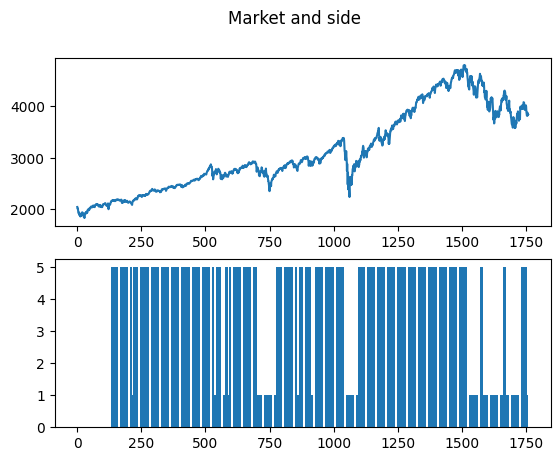

In [18]:
fig, axs = plt.subplots(2)
fig.suptitle('Market and side')
axs[0].plot(df1.index, df1[f'{market_ticker}'])
axs[1].bar(df1.index, df1['bars'])